An ARIMA model is a class of statistical model for analyzing and forecasting time series data.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

In [2]:
import pandas as pd
import numpy as np
import gmaps as gm
import datetime 
from sklearn import linear_model
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/melis/Downloads/res.csv", sep=",")
df.head()

,attributes.nom_dept,attributes.code_station,attributes.nom_station,attributes.nom_com,attributes.date_debut,attributes.date_fin,attributes.nom_poll,attributes.valeur,geometry.x,geometry.y
0,HAUTE-GARONNE,FR50021,Toulouse-Mazades Urbain,TOULOUSE,1.605200e+12,1.605204e+12,PM10,19.7,1.438610,43.6236
1,HAUTE-GARONNE,FR50030,Toulouse-Berthelot Urbain,TOULOUSE,1.605200e+12,1.605204e+12,PM10,20.5,1.444030,43.5873
2,HAUTE-GARONNE,FR50060,Montauban - Ramierou Urbain,MURET,1.605200e+12,1.605204e+12,PM10,41.3,1.375310,44.0129
3,HAUTES-PYRENEES,FR50052,Tarbes-Dupuy Urbain,TARBES,1.605200e+12,1.605204e+12,PM10,15.7,0.062222,43.2303
4,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,1.605200e+12,1.605204e+12,PM10,14.4,2.570700,44.3570


In [4]:
df["attributes.date_debut"] = [datetime.datetime.fromtimestamp(i /1000) for i in df["attributes.date_debut"]]
df = df.loc[(df['attributes.valeur']>=0) & (df["attributes.nom_station"] == "Rodez - Camonil Urbain") & (df["attributes.nom_poll"] == "PM10")]
df.reset_index(drop=True, inplace=True) #Reset index after removing the outliers

In [5]:
df

,attributes.nom_dept,attributes.code_station,attributes.nom_station,attributes.nom_com,attributes.date_debut,attributes.date_fin,attributes.nom_poll,attributes.valeur,geometry.x,geometry.y
0,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2020-11-12 18:00:00,1.605204e+12,PM10,14.4,2.5707,44.357
1,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2020-11-12 19:00:00,1.605208e+12,PM10,16.8,2.5707,44.357
2,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2020-11-12 20:00:00,1.605211e+12,PM10,9.7,2.5707,44.357
3,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2020-11-12 21:00:00,1.605215e+12,PM10,9.4,2.5707,44.357
4,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2020-11-12 22:00:00,1.605218e+12,PM10,10.7,2.5707,44.357
...,...,...,...,...,...,...,...,...,...,...
3305,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2021-03-04 05:00:00,1.614834e+12,PM10,45.6,2.5707,44.357
3306,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2021-03-04 06:00:00,1.614838e+12,PM10,46.3,2.5707,44.357
3307,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2021-03-04 07:00:00,1.614841e+12,PM10,49.2,2.5707,44.357
3308,AVEYRON,FR50815,Rodez - Camonil Urbain,RODEZ,2021-03-04 08:00:00,1.614845e+12,PM10,53.6,2.5707,44.357


In [6]:
data = pd.DataFrame(list(df["attributes.valeur"]), index = df["attributes.date_debut"], columns = ["attributes.valeur"])
data.index = pd.to_datetime(data.index)
data

,attributes.valeur
attributes.date_debut,
2020-11-12 18:00:00,14.4
2020-11-12 19:00:00,16.8
2020-11-12 20:00:00,9.7
2020-11-12 21:00:00,9.4
2020-11-12 22:00:00,10.7
...,...
2021-03-04 05:00:00,45.6
2021-03-04 06:00:00,46.3
2021-03-04 07:00:00,49.2


In [7]:
x = round(len(data)*0.9)
data.index[x]

Timestamp('2021-02-18 15:00:00')

<AxesSubplot:title={'center':'Graph'}, xlabel='attributes.date_debut'>

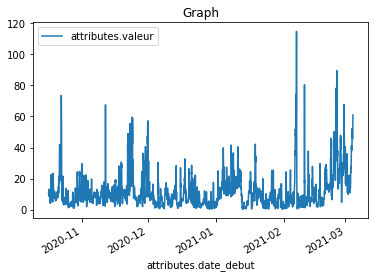

In [8]:
data.plot(title = "Graph")

In [ ]:
import pmdarima as pm
stepwise_model = pm.auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=24, start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=22.57 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=23284.868, Time=0.41 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=22050.641, Time=2.17 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=10.24 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=23042.853, Time=0.51 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=21646.480, Time=10.36 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=46.34 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=14.11 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=21842.419, Time=5.93 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=21578.886, Time=14.72 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=21976.248, Time=4.24 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=57.66 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=25.22 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=21571.239, Time=15.91 sec
 ARIMA(3,1,0)(1,1,0)[24]        

In [ ]:
datatrain = data.loc['2020-11-12 18:00:00':'2021-02-18 15:00:00']
datatest = data.loc['2021-02-18 15:00:00':]

In [ ]:
stepwise_model.fit(data)

In [ ]:
datatest

In [ ]:
future_forecast = stepwise_model.predict(n_periods = len(datatest))
print(future_forecast)